# **Final Project** - `Yassine ERRAJI` & `William PELTIER`

## ***Business Problem Definition*** 

William and I came to notice that companies struggle to offer competitive salaries for data science-related positions.

So we decided to build a project that analyzes salary determinants, predicts expected compensation, segments job roles, and visualizes job families to improve HR compensation strategy and hiring decisions.

Chapters seen in class were the pillars of this project and we will effort ourselves to cover as many concepts studied as possible but only while it is **not** at the expense of high quality insights and a concrete business problem being solved.

## ***The Dataset*** 

* The Data in the dataset is extracted from the Glassdoor website, which is a job posting website. 

* The dataset has data related to data science jobs and salaries and a lot more, offering a clear view of job opportunities. 

* It is packed with essential details like job titles, estimated salaries, job descriptions, company ratings, and key company info such as location, size, and industry. 

### A few columns in the dataset include information on

**Job Title:** Title of the Job

**Salary Estimate:** Estimated salary for the job that the company provides

**Job Description:** The description of the job

**Rating:** Rating of the company

**Company Name:** Name of the Company

**Location:** Location of the job

**Headquarters:** Headquarters of the company

**Size:** Number of employees in the company

**Founded:** The year company founded

**Type of ownership:** Ownership types like private, public, government, and non-profit organizations

**Industry:** Industry type like Aerospace, Energy where the company provides services

**Sector:** Which type of services company provide in the industry, like industry (Energy), Sector (Oil, Gas)

**Revenue:** Total revenue of the company

**Competitors:** Company competitors

... and more !

## ***Tasks Performed*** 

* **Regression** : Predict average salary.

* **Classification** : Predict whether a job is "high-paying".

* **Clustering** : Segment job postings into meaningful job families.

* **Dimensionality Reduction** : PCA & t-SNE to visualize job similarities

## 1. Data Importation & Base Cleaning

In [193]:
# Core stack for data handling and quick visuals
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re  # regex helpers for interval extraction
import textwrap  # tidy axis labels
import warnings
warnings.filterwarnings("ignore")

# Display settings to keep outputs readable in the notebook
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

In [194]:
# Load the dataset (keep the CSV next to this notebook)
data_path = "Glassdoor_Salary.csv"

df_raw = pd.read_csv(data_path)

print(f"Rows: {df_raw.shape[0]:,} | Columns: {df_raw.shape[1]}")
df_raw.head(3)

Rows: 742 | Columns: 28


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1


In [195]:
# Inspect structure with numeric stats
print("\n[Numeric summary]")
df_raw.describe(include=np.number).T.round(2)


[Numeric summary]


,count,mean,std,min,25%,50%,75%,max
Rating,742.0,3.62,0.80,-1.0,3.3,3.7,4.0,5.0
Founded,742.0,1837.15,497.18,-1.0,1939.0,1988.0,2007.0,2019.0
hourly,742.0,0.03,0.18,0.0,0.0,0.0,0.0,1.0
employer_provided,742.0,0.02,0.15,0.0,0.0,0.0,0.0,1.0
min_salary,742.0,74.07,31.87,10.0,52.0,69.5,91.0,202.0
max_salary,742.0,127.18,46.91,16.0,96.0,124.0,155.0,306.0
avg_salary,742.0,100.63,38.86,13.5,73.5,97.5,122.5,254.0
same_state,742.0,0.56,0.50,0.0,0.0,1.0,1.0,1.0
age,742.0,46.59,53.78,-1.0,11.0,24.0,59.0,276.0
python_yn,742.0,0.53,0.50,0.0,0.0,1.0,1.0,1.0


In [197]:
df_raw.dtypes

Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
hourly                 int64
employer_provided      int64
min_salary             int64
max_salary             int64
avg_salary           float64
company_txt           object
job_state             object
same_state             int64
age                    int64
python_yn              int64
R_yn                   int64
spark                  int64
aws                    int64
excel                  int64
dtype: object

In [196]:
# Missingness per column (absolute + percentage)
missing = (
    df_raw.isna()
    .sum()
    .to_frame(name="missing_count")
    .assign(missing_pct=lambda d: (d["missing_count"] / len(df_raw) * 100).round(2))
    .sort_values("missing_pct", ascending=False)
)

missing.head(20)

,missing_count,missing_pct
Job Title,0,0.0
Salary Estimate,0,0.0
aws,0,0.0
spark,0,0.0
R_yn,0,0.0
python_yn,0,0.0
age,0,0.0
same_state,0,0.0
job_state,0,0.0
company_txt,0,0.0


The dataset has no missing values. 
We still need to check for duplicates though.

In [213]:
# ============================================
# 1. Build a clean working copy of the dataset
# ============================================

print("Starting shape (raw):", df_raw.shape)

# Work on a copy so that df_raw always remains untouched
df_clean = df_raw.copy()


# ============================================
# 2. Remove exact duplicate rows (conservative)
# ============================================

before = len(df_clean)
df_clean = df_clean.drop_duplicates().reset_index(drop=True)
print(f"Removed {before - len(df_clean)} duplicate rows")

# =====================================================================
# 3. Optionally mark main text / categorical fields as 'category' dtype
#    (helps memory, and makes their role explicit for later encoding)
# =====================================================================

categorical_cols = [
    "Job Title", "Company Name", "company_txt",
    "Location", "Headquarters",
    "Size", "Type of ownership", "Industry", "Sector",
    "Revenue", "job_state", "Competitors"
]

categorical_cols_existing = [c for c in categorical_cols if c in df_clean.columns]

for col in categorical_cols_existing:
    df_clean[col] = df_clean[col].astype("category")


# ======================================================
# 4. Drop decided as "useless" columns
# ======================================================

columns_to_drop = [
    'Job Description',
    'Headquarters',
    'Industry',
    'Competitors',
    'hourly',
    'employer_provided',
    'company_txt'
]

df_clean = df_clean.drop(columns=columns_to_drop)

# ======================================================
# 5. Specific Rating cleaning
# ======================================================

# Compute the median without the invalid -1 values
median_rating = df_clean.loc[df_clean["Rating"] != -1, "Rating"].median()

# Replace -1 by the median
df_clean.loc[df_clean["Rating"] == -1, "Rating"] = median_rating

# ===============
# 9. Final checks
# ===============

print("Clean shape:", df_clean.shape)
df_clean.head(3)

Starting shape (raw): (742, 28)
Removed 275 duplicate rows
Clean shape: (467, 21)


,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Sector,Revenue,min_salary,max_salary,avg_salary,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),3.8,Tecolote Research\n3.8,"Albuquerque, NM",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,$50 to $100 million (USD),53,91,72.0,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System\n3.4,"Linthicum, MD",10000+ employees,1984,Other Organization,Health Care,$2 to $5 billion (USD),63,112,87.5,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),4.8,KnowBe4\n4.8,"Clearwater, FL",501 to 1000 employees,2010,Company - Private,Business Services,$100 to $500 million (USD),80,90,85.0,FL,1,10,1,0,1,0,1


We are now ready to move on to EDA.

## 2. Exploratory Data Analysis 

In [214]:
# ===========================================================
# Exploratory Data Analysis (EDA)
# Goal:
#   - Gain a clear overview of the dataset structure
#   - Understand salary distribution and drivers
#   - Explore categorical variables (industry, sector, state)
#   - Analyze technical skill prevalence
#   - Identify relationships between key features
#   - Generate business-relevant insights to guide modeling
# ===========================================================

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="Set2")
plt.rcParams["figure.figsize"] = (10, 6)

# --------------------------------------------
# 1. Quick structural overview of the dataset
# --------------------------------------------
print("Dataset shape:", df_clean.shape)
df_clean.info()
df_clean.describe(include=np.number).T

Dataset shape: (467, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Job Title          467 non-null    category
 1   Salary Estimate    467 non-null    object  
 2   Rating             467 non-null    float64 
 3   Company Name       467 non-null    category
 4   Location           467 non-null    category
 5   Size               467 non-null    category
 6   Founded            467 non-null    int64   
 7   Type of ownership  467 non-null    category
 8   Sector             467 non-null    category
 9   Revenue            467 non-null    category
 10  min_salary         467 non-null    int64   
 11  max_salary         467 non-null    int64   
 12  avg_salary         467 non-null    float64 
 13  job_state          467 non-null    category
 14  same_state         467 non-null    int64   
 15  age                467 non-null 

,count,mean,std,min,25%,50%,75%,max
Rating,467.0,3.723019,0.564451,1.9,3.4,3.75,4.1,5.0
Founded,467.0,1832.441113,508.661732,-1.0,1939.0,1991.00,2007.0,2019.0
min_salary,467.0,74.334047,30.550454,10.0,53.0,71.00,90.5,202.0
max_salary,467.0,127.623126,45.156468,16.0,98.0,124.00,150.0,306.0
avg_salary,467.0,100.978587,37.318755,13.5,76.0,97.50,121.0,254.0
same_state,467.0,0.537473,0.499128,0.0,0.0,1.00,1.0,1.0
age,467.0,44.676660,52.429355,-1.0,10.0,24.00,55.0,276.0
python_yn,467.0,0.556745,0.497302,0.0,0.0,1.00,1.0,1.0
R_yn,467.0,0.004283,0.065372,0.0,0.0,0.00,0.0,1.0
spark,467.0,0.237687,0.426123,0.0,0.0,0.00,0.0,1.0


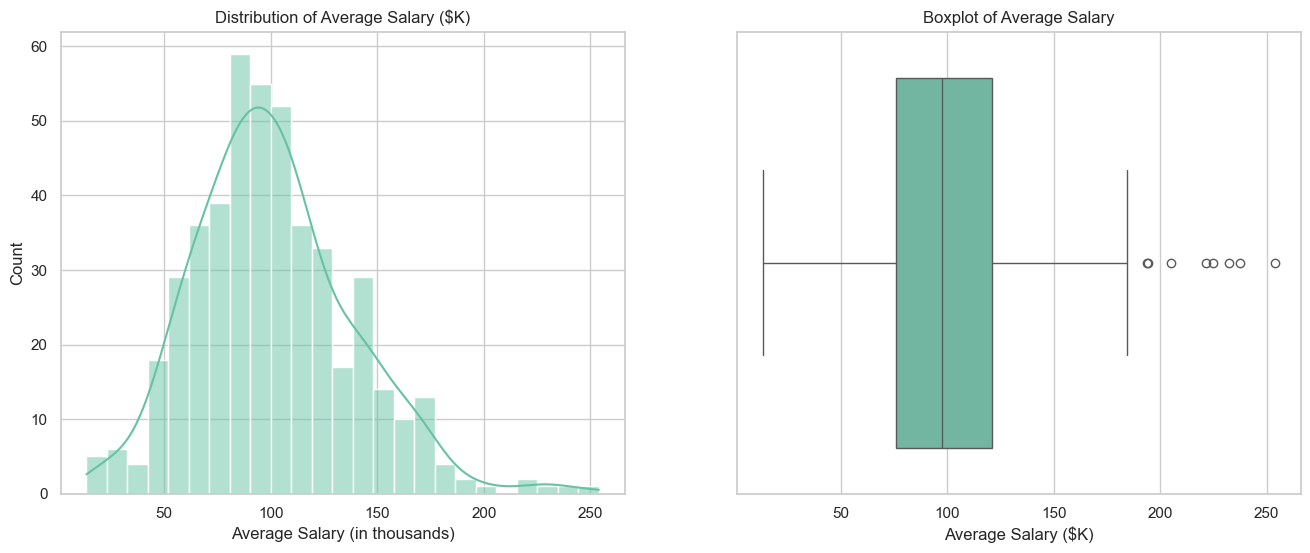

count    467.000000
mean     100.978587
std       37.318755
min       13.500000
10%       58.300000
25%       76.000000
50%       97.500000
75%      121.000000
90%      150.500000
max      254.000000
Name: avg_salary, dtype: float64


In [215]:
# =====================================================
# 2. Salary distribution and summary statistics
#    -> Provides insight into skewness, outliers, scale
# =====================================================

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Histogram of average salary
sns.histplot(df_clean["avg_salary"], kde=True, ax=ax[0], bins=25)
ax[0].set_title("Distribution of Average Salary ($K)")
ax[0].set_xlabel("Average Salary (in thousands)")
ax[0].set_ylabel("Count")

# Boxplot to highlight outliers
sns.boxplot(x=df_clean["avg_salary"], ax=ax[1])
ax[1].set_title("Boxplot of Average Salary")
ax[1].set_xlabel("Average Salary ($K)")

plt.show()

print(df_clean["avg_salary"].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]))

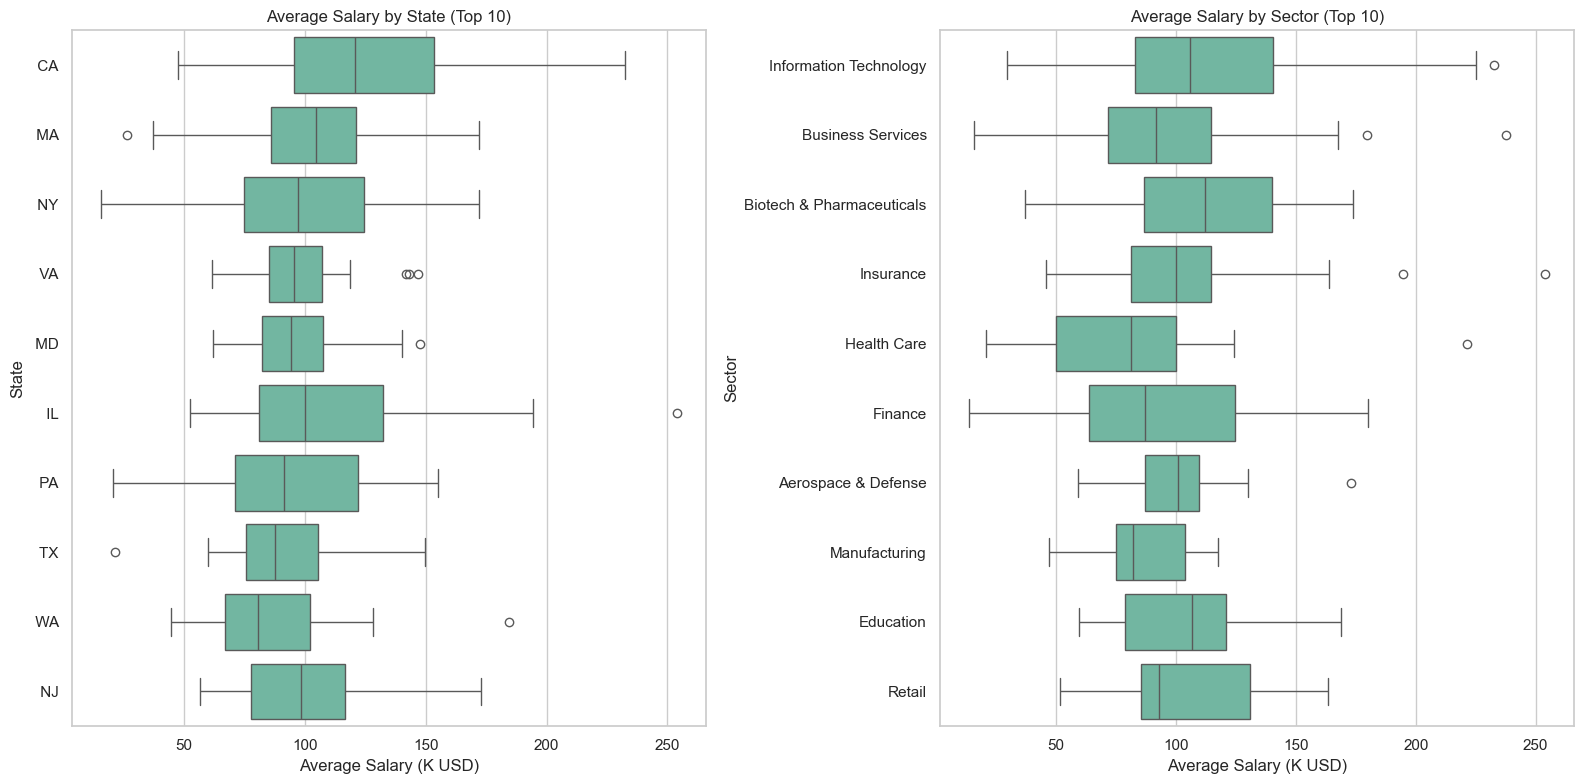

In [216]:
# =========================================================================
# Salary variation by geography and by industry (Top 10 categories each)
# Goal:
#   - Highlight geographic salary differences (job_state)
#   - Compare salary distributions across major industries
#   - Keep plots readable by restricting to top 10 categories
# =========================================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 8))


# ---------------------------------------------------------
# 1. Salary distribution by job_state (Top 10 most frequent)
# ---------------------------------------------------------
if "job_state" in df_clean.columns:

    # Identify the 10 states with the most job postings
    top_states = df_clean["job_state"].value_counts().head(10).index

    sns.boxplot(
        data=df_clean[df_clean["job_state"].isin(top_states)],
        y="job_state",
        x="avg_salary",
        ax=axes[0],
        orient="h",
        order=top_states
    )

    axes[0].set_title("Average Salary by State (Top 10)")
    axes[0].set_xlabel("Average Salary (K USD)")
    axes[0].set_ylabel("State")


# ---------------------------------------------------------
# 2. Salary distribution by industry (Top 10 industries)
#    -> Labels shortened to avoid clutter on the y-axis
# ---------------------------------------------------------


# Identify top 10 industries by frequency
top_industries = df_clean["Sector"].value_counts().head(10).index.tolist()

# Shorten labels to keep plot readable
short_labels = [
    textwrap.shorten(str(label), width=32, placeholder="…")
    for label in top_industries
]

sns.boxplot(
    data=df_clean[df_clean["Sector"].isin(top_industries)],
    y="Sector",
    x="avg_salary",
    ax=axes[1],
    orient="h",
    order=top_industries
)

axes[1].set_title("Average Salary by Sector (Top 10)")
axes[1].set_xlabel("Average Salary (K USD)")
axes[1].set_ylabel("Sector")
axes[1].set_yticklabels(short_labels)


# Final layout formatting
plt.tight_layout()
plt.show()

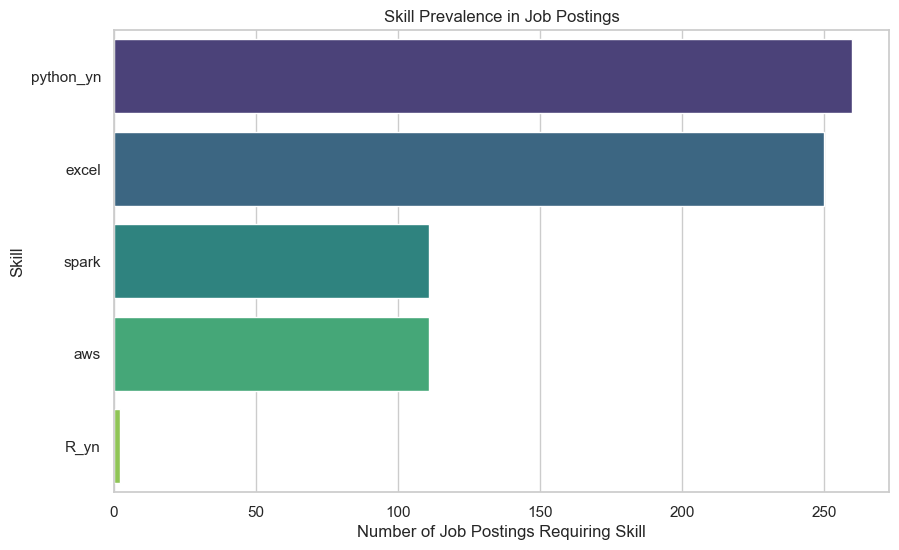

python_yn    260
excel        250
spark        111
aws          111
R_yn           2
dtype: int64

In [217]:
# =====================================================
# 4. Prevalence of technical skills in job postings
#    -> Helps understand requirements and market demand
# =====================================================

skill_cols = ["python_yn", "R_yn", "spark", "aws", "excel"]
skill_sums = df_clean[skill_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=skill_sums.values, y=skill_sums.index, palette="viridis")
plt.title("Skill Prevalence in Job Postings")
plt.xlabel("Number of Job Postings Requiring Skill")
plt.ylabel("Skill")
plt.show()

skill_sums

In [218]:
# =====================================================
# 5. Salary premium analysis for each skill
#    -> Quantifies how much each technical skill increases salary
# =====================================================

skill_premiums = {}
for skill in skill_cols:
    premium = (
        df_clean.groupby(skill)["avg_salary"]
        .mean()
        .rename({0: "No", 1: "Yes"})
    )
    skill_premiums[skill] = premium

pd.DataFrame(skill_premiums).round(2)

,python_yn,R_yn,spark,aws,excel
No,89.13,101.11,97.87,98.05,103.63
Yes,110.41,70.75,110.95,110.37,98.68


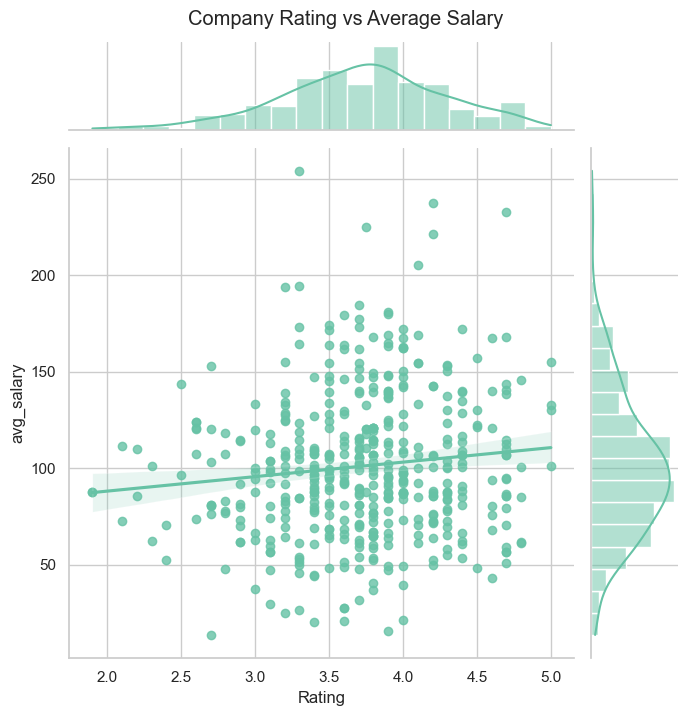

In [219]:
# =====================================================
# 6. Relationship between Company Rating and Salary
#    -> Measures whether higher-rated companies pay more
# =====================================================

sns.jointplot(data=df_clean, x="Rating", y="avg_salary", kind="reg", height=7)
plt.suptitle("Company Rating vs Average Salary", y=1.02)
plt.show()

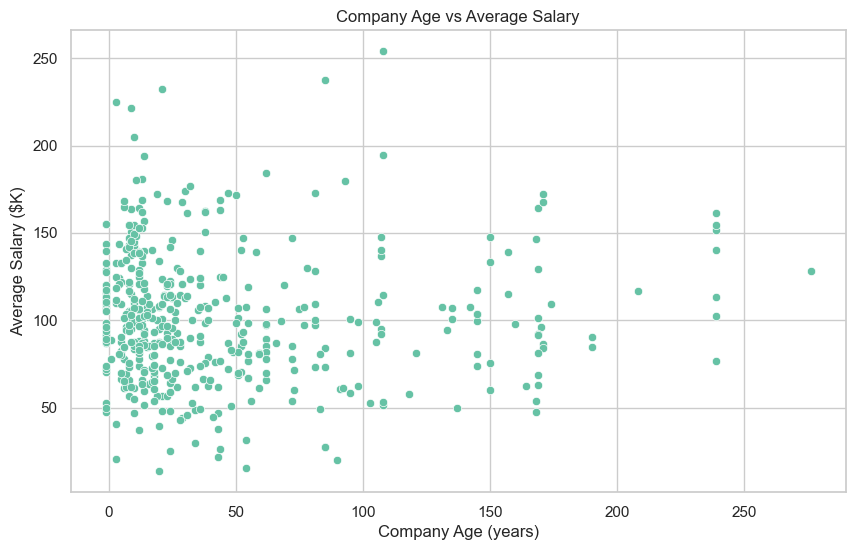

In [220]:
# =====================================================
# 8. Relationship between Company Age and Salary
# =====================================================

sns.scatterplot(data=df_clean, x="age", y="avg_salary")
plt.title("Company Age vs Average Salary")
plt.xlabel("Company Age (years)")
plt.ylabel("Average Salary ($K)")
plt.show()

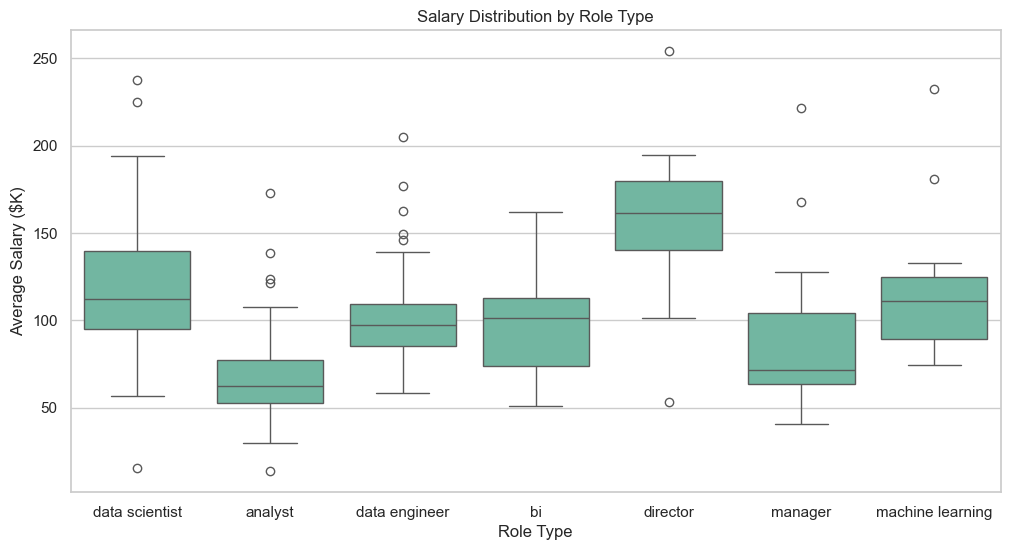

In [221]:
# =====================================================
# 9. Salary differences across job categories
#    -> Very business-oriented insight: which roles command higher pay
# =====================================================

# Extract broad job categories (simple heuristic)
df_clean["role_type"] = (
    df_clean["Job Title"]
    .str.lower()
    .str.extract(r"(data scientist|data engineer|analyst|machine learning|manager|director|cloud|bi)")
)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x="role_type", y="avg_salary")
plt.title("Salary Distribution by Role Type")
plt.xlabel("Role Type")
plt.ylabel("Average Salary ($K)")
plt.show()

2. Analyse par type de poste

🔹 Data Scientist
	•	Médiane autour de 110–115k$
	•	Dispersion importante → marché hétérogène
	•	Présence d’outliers élevés (>200k$)
➡️ Rôle bien rémunéré mais très dépendant de l’expérience et du contexte.

🔹 Analyst
	•	Médiane autour de 60k$
	•	Boîte relativement compacte
➡️ Poste le moins rémunéré en moyenne, avec peu de variabilité.

🔹 Data Engineer
	•	Médiane proche de 95–100k$
	•	Distribution assez stable
➡️ Salaire solide et relativement prévisible.

🔹 BI (Business Intelligence)
	•	Médiane ~100k$
	•	Variabilité notable
➡️ Rôle intermédiaire avec écarts selon responsabilités techniques.

🔹 Director
	•	Médiane la plus élevée (~160k$)
	•	Large dispersion
➡️ Rôle senior à forte responsabilité, salaires élevés mais très variables.

🔹 Manager
	•	Médiane autour de 70k$
	•	Plusieurs outliers élevés
➡️ Forte dépendance au secteur et à la taille de l’entreprise.

🔹 Machine Learning
	•	Médiane ~110k$
	•	Distribution assez large
➡️ Profil technique spécialisé, bien valorisé sur le marché.

## 3. Feature Engineering

In [ ]:
# ============================================================================
# Feature Engineering
# Goals :
#   - Create additional predictive features relevant to salary modeling
#   - Transform textual/categorical data into usable structured variables
#   - Prepare a modeling-ready dataset for regression and classification
#   - Keep transformations transparent, interpretable, and business-relevant
# ============================================================================

df_fe = df_clean.copy()  # Work on a copy to preserve the cleaned dataset

In [224]:
df_fe.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Sector,Revenue,min_salary,max_salary,avg_salary,job_state,same_state,age,python_yn,R_yn,spark,aws,excel,role_type
0,Data Scientist,$53K-$91K (Glassdoor est.),3.8,Tecolote Research\n3.8,"Albuquerque, NM",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,$50 to $100 million (USD),53,91,72.0,NM,0,47,1,0,0,0,1,data scientist
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System\n3.4,"Linthicum, MD",10000+ employees,1984,Other Organization,Health Care,$2 to $5 billion (USD),63,112,87.5,MD,0,36,1,0,0,0,0,data scientist
2,Data Scientist,$80K-$90K (Glassdoor est.),4.8,KnowBe4\n4.8,"Clearwater, FL",501 to 1000 employees,2010,Company - Private,Business Services,$100 to $500 million (USD),80,90,85.0,FL,1,10,1,0,1,0,1,data scientist
3,Data Scientist,$56K-$97K (Glassdoor est.),3.8,PNNL\n3.8,"Richland, WA",1001 to 5000 employees,1965,Government,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),56,97,76.5,WA,1,55,1,0,0,0,0,data scientist
4,Data Scientist,$86K-$143K (Glassdoor est.),2.9,Affinity Solutions\n2.9,"New York, NY",51 to 200 employees,1998,Company - Private,Business Services,Unknown / Non-Applicable,86,143,114.5,NY,1,22,1,0,0,0,1,data scientist


## 4. Regression - Predicting Salary

Task 4.1 – Baseline model

	•	Linear Regression
	•	Evaluate: RMSE, MAE, R²

Task 4.2 – Regularized models

Use:

	•	Ridge
	•	Lasso
	•	Compare parameter tuning via GridSearchCV

Task 4.3 – Tree-based regressors

	•	Random Forest Regressor
	•	Gradient Boosting Regressor

Task 4.4 – Model comparison table

Include:

	•	RMSE on train & test
	•	R² test
	•	Which model generalizes best?

Task 4.5 – Interpret results

For the best model:

	•	Feature importances
	•	Which skills increase salary?
	•	Which industries pay more?
	•	How much does a 1-point rating increase salary?
	•	Effect of seniority

This is where the business insights shine.

## 5. Classification - Predicting High-Paying Jobs

Task 5.1 – Create a classification target

Define :
```python 
threshold = df["avg_salary"].quantile(0.75)
df["high_salary"] = (df["avg_salary"] >= threshold).astype(int)
````
Task 5.2 – Train classification models

Models to include:

	•	Logistic Regression
	•	KNN
	•	Decision Tree
	•	Random Forest / Gradient Boosting

Task 5.3 – Evaluate performance

	•	Confusion matrix
	•	Precision, recall, F1
	•	ROC-AUC curve

Task 5.4 – Explain model

From logistic regression:

	•	Significant predictors
	•	Odds ratios
From tree models:
	•	Feature importances

Business interpretation:

	•	Which skills most strongly predict high-paying jobs?
	•	Which industries/states tend to offer higher salaries?
	•	What role does company size or age play?

## 6. Dimensionality Reduction (PCA + t-SNE)

Task 6.1 – Select relevant features

Two possible approaches:

Approach A — Skill space only

	•	python_yn, R_yn, spark, aws, excel

Approach B — Full feature set
(use scaled numeric + encoded categorical)

Task 6.2 – Standardize features

Use StandardScaler.

Task 6.3 – PCA

	•	Show explained variance ratio
	•	Plot PC1 vs PC2
	•	Interpret loadings (e.g., PC1 = cloud skills vs analyst skills)

Task 6.4 – t-SNE or UMAP

	•	Use perplexity tuning
	•	Visualize role clusters in 2D

Insight:

Reveal natural divisions such as:

	•	Data engineering vs. analyst vs. ML roles
	•	Cloud-heavy vs. coding-heavy vs. business roles

## 7. Clustering Analysis

Task 7.1 – Apply clustering on PCA-reduced data

Methods:

	•	K-means
	•	Hierarchical clustering
	•	(optional) DBSCAN

Task 7.2 – Determine optimal cluster number

Use:

	•	Elbow method
	•	Silhouette score

Task 7.3 – Visualize clusters (very important)

Show:

	•	Clusters on PCA components
	•	Clusters on t-SNE map

Task 7.4 – Characterize clusters

For each cluster:

	•	Mean salary
	•	Most common skills
	•	Dominant industries or job titles
	•	Typical company size

Business insights:

	•	Identify distinct job families
	•	Understand which clusters correspond to high-paying profiles
	•	Recommend tailored compensation bands


## 8. Business Interpretation & Recommendation Section 

Task 8.1 – Synthesize key insights from all models

Examples:

	•	Python + AWS adds X salary premium
	•	Data engineers cluster separately and earn more than analysts
	•	Industry A systematically underpays compared to industry B
	•	Rating and company age have moderate influence

Task 8.2 – Provide actionable recommendations

For example:

	•	For companies:
	•	“Increase salary offers in states X and Y to remain competitive”
	•	“Roles requiring cloud skills should have independent pay scales”
	•	For job seekers:
	•	“Adding Spark or AWS significantly increases expected salary”

Task 8.3 – Highlight limitations and future improvements

	•	Dataset size
	•	Potential sampling bias
	•	Missing compensation factors (benefits, bonuses)
	•	Text processing could be extended